The following notebook contains all the code necessary to produce the panels presented in __Figure S6 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 / CM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Guo et al., 2018; Krasting et al., 2018):

> Guo, H., and Coauthors, 2018: NOAA-GFDL GFDL-CM4 model output piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8666.

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load pre-computed energy transport components

In [2]:
cm4_heat_trans_ds = xr.open_dataset('cm4_heat_transport_components_antwater_exps.nc')
esm4_heat_trans_ds = xr.open_dataset('esm4_heat_transport_components_antwater_exps.nc')

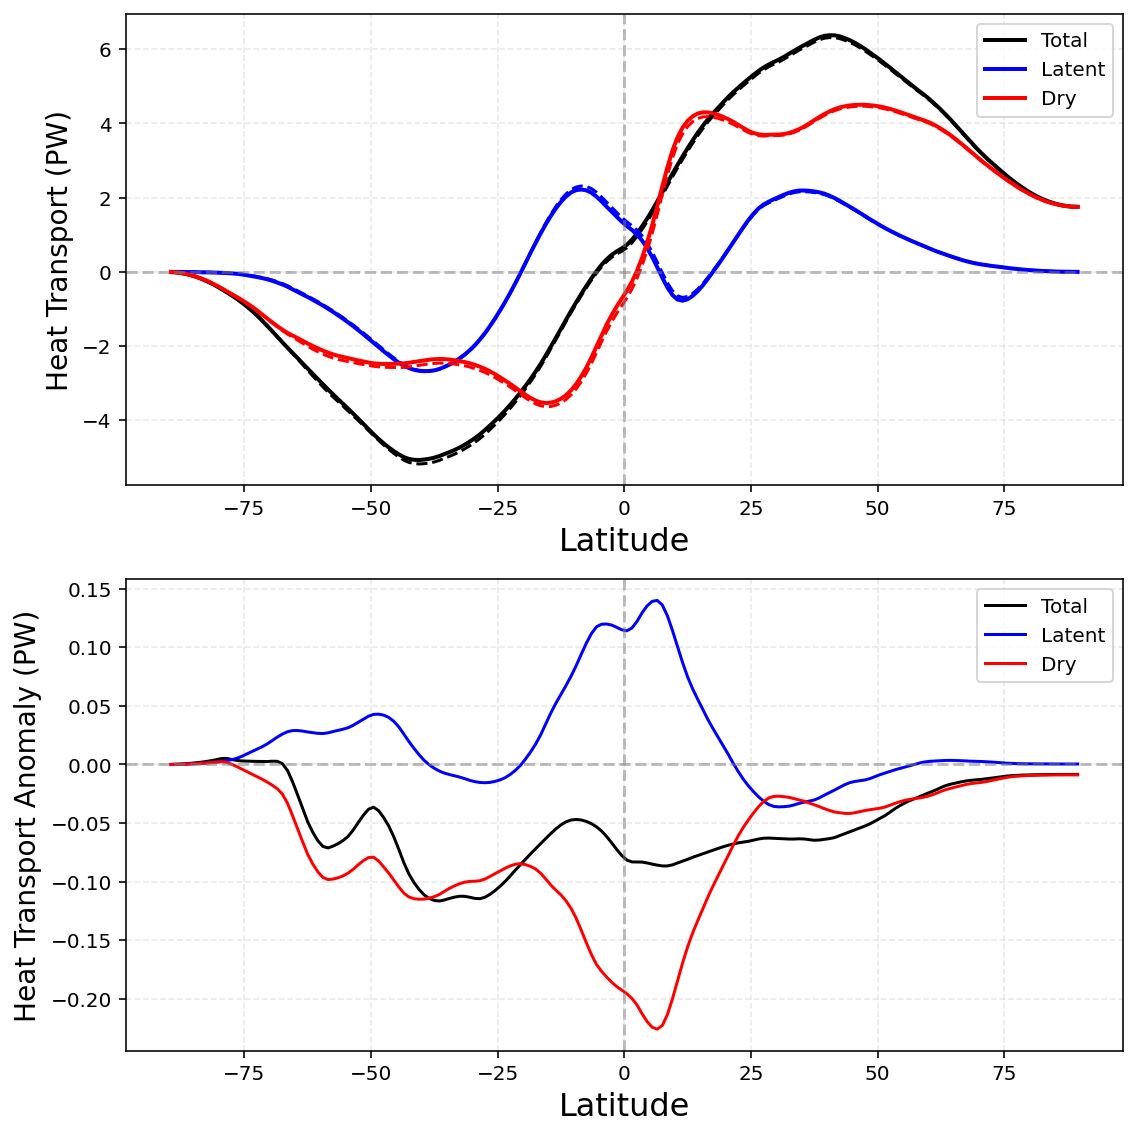

In [50]:
fig, (ax0,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(8,8))

## top plot
cm4_heat_trans_ds.moist_ens_int.plot(ax=ax0,color='k',linestyle='--')
cm4_heat_trans_ds.moist_piC_int.plot(ax=ax0,color='k',linewidth=2,label='Total')
cm4_heat_trans_ds.wet_ens_int.plot(ax=ax0,color='blue',linestyle='--')
cm4_heat_trans_ds.wet_piC_int.plot(ax=ax0,color='blue',linewidth=2,label='Latent')
cm4_heat_trans_ds.dry_ens_int.plot(ax=ax0,color='red',linestyle='--')
cm4_heat_trans_ds.dry_piC_int.plot(ax=ax0,color='red',linewidth=2,label='Dry')


## bottom plot
(cm4_heat_trans_ds.moist_ens_int - cm4_heat_trans_ds.moist_piC_int).plot(ax=ax1,color='k',label='Total')
(cm4_heat_trans_ds.wet_ens_int - cm4_heat_trans_ds.wet_piC_int).plot(ax=ax1,color='blue',label='Latent')
(cm4_heat_trans_ds.dry_ens_int - cm4_heat_trans_ds.dry_piC_int).plot(ax=ax1,color='red',label='Dry')

ax0.axhline(0, color='grey', alpha=0.5, linestyle='--')
ax0.axvline(0, color='grey', alpha=0.5, linestyle='--')
ax0.set_ylabel("Heat Transport (PW)",fontsize=14)
ax0.set_xlabel("Latitude",fontsize=16)
ax0.grid(color='lightgrey', alpha=0.5, linestyle='--')

ax1.axhline(0, color='grey', alpha=0.5, linestyle='--')
ax1.axvline(0, color='grey', alpha=0.5, linestyle='--')
ax1.set_ylabel("Heat Transport Anomaly (PW)",fontsize=14)
ax1.set_xlabel("Latitude",fontsize=16)
ax1.grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

ax0.legend()
ax1.legend()

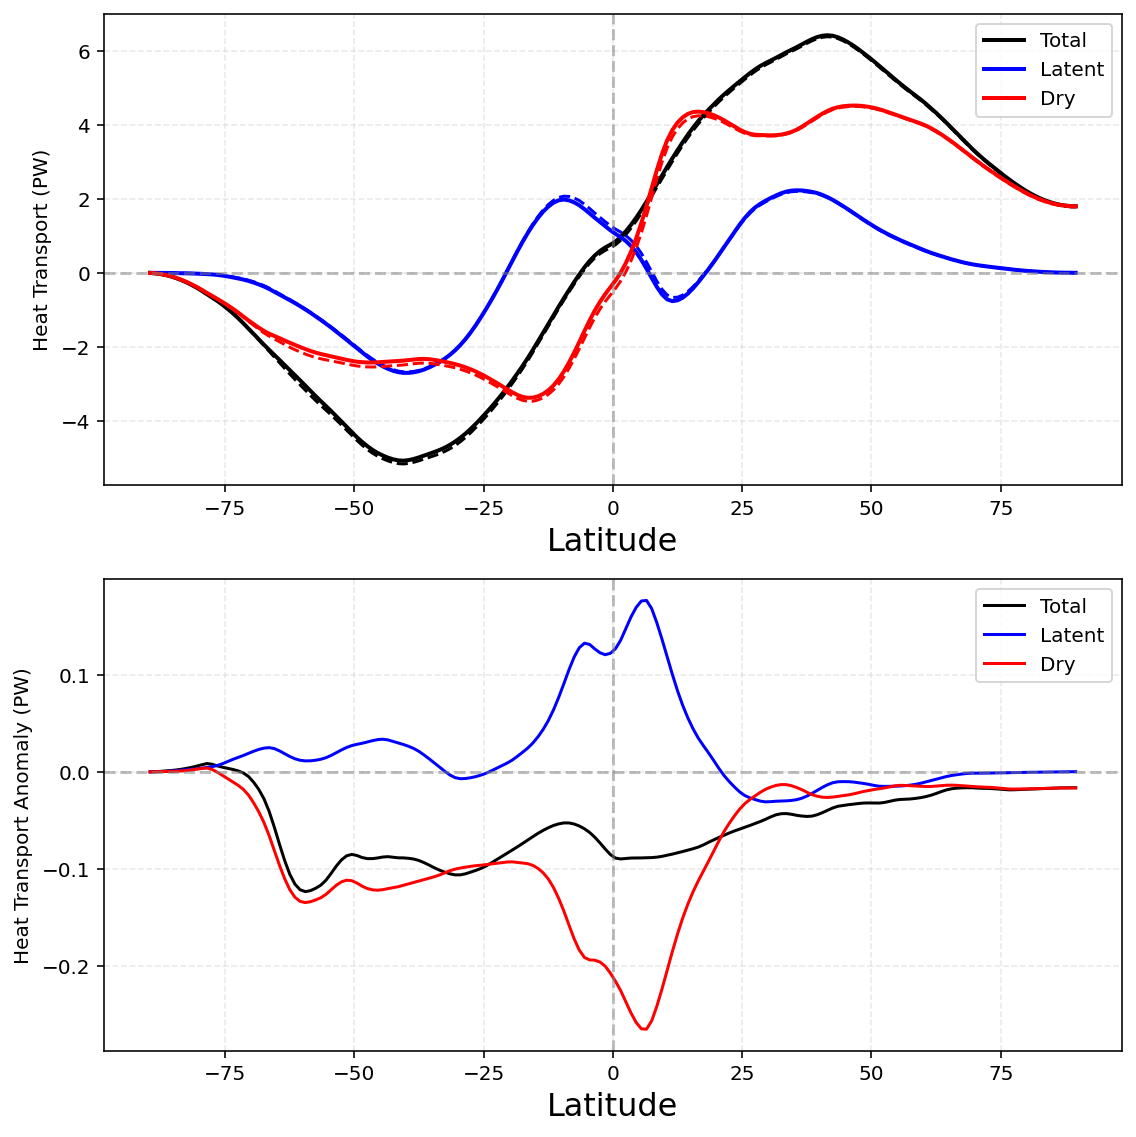

In [52]:
fig, (ax0,ax1) = plt.subplots(ncols=1,nrows=2,figsize=(8,8))

## top plot
esm4_heat_trans_ds.moist_ens_int.plot(ax=ax0,color='k',linestyle='--')
esm4_heat_trans_ds.moist_piC_int.plot(ax=ax0,color='k',linewidth=2,label='Total')
esm4_heat_trans_ds.wet_ens_int.plot(ax=ax0,color='blue',linestyle='--')
esm4_heat_trans_ds.wet_piC_int.plot(ax=ax0,color='blue',linewidth=2,label='Latent')
esm4_heat_trans_ds.dry_ens_int.plot(ax=ax0,color='red',linestyle='--')
esm4_heat_trans_ds.dry_piC_int.plot(ax=ax0,color='red',linewidth=2,label='Dry')


## bottom plot
(esm4_heat_trans_ds.moist_ens_int - esm4_heat_trans_ds.moist_piC_int).plot(ax=ax1,color='k',label='Total')
(esm4_heat_trans_ds.wet_ens_int - esm4_heat_trans_ds.wet_piC_int).plot(ax=ax1,color='blue',label='Latent')
(esm4_heat_trans_ds.dry_ens_int - esm4_heat_trans_ds.dry_piC_int).plot(ax=ax1,color='red',label='Dry')


ax0.axhline(0, color='grey', alpha=0.5, linestyle='--')
ax0.axvline(0, color='grey', alpha=0.5, linestyle='--')
ax0.set_ylabel("Heat Transport (PW)",fontsize=10)
ax0.set_xlabel("Latitude",fontsize=16)
ax0.grid(color='lightgrey', alpha=0.5, linestyle='--')

ax1.axhline(0, color='grey', alpha=0.5, linestyle='--')
ax1.axvline(0, color='grey', alpha=0.5, linestyle='--')
ax1.set_ylabel("Heat Transport Anomaly (PW)",fontsize=10)
ax1.set_xlabel("Latitude",fontsize=16)
ax1.grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

ax0.legend()
ax1.legend()